In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithmetic\IPyNb


In [5]:
df = pd.read_csv("../Python/Output/powVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,pow,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,Gaussian,0.2,-1.0,1.0,0.978284,-1.672436,19.710492,0.249309,0.254843,0.044750,...,0.173794,0.141366,0.110965,0.074990,0.059283,0.045602,0.032428,0.028375,0.024321,0.021281
1,Uniform,0.2,-1.0,1.0,0.861564,-1.009579,2.079756,0.219564,0.254843,0.043162,...,0.224478,0.207479,0.192481,0.178982,0.166983,0.063994,0.000000,0.000000,0.000000,0.000000
2,Gaussian,0.2,-0.8,1.0,0.996183,-1.875167,16.755205,0.190605,0.191335,0.031508,...,0.173340,0.140395,0.122656,0.084136,0.058794,0.052205,0.034465,0.030411,0.025849,0.020781
3,Uniform,0.2,-0.8,1.0,0.903837,-1.106751,2.118046,0.172936,0.191335,0.030806,...,0.224978,0.209479,0.195480,0.183482,0.171483,0.096990,0.000000,0.000000,0.000000,0.000000
4,Gaussian,0.2,-0.6,1.0,0.998928,-2.057624,14.060957,0.137604,0.137751,0.020557,...,0.181247,0.142770,0.123532,0.089611,0.061260,0.052147,0.035439,0.032402,0.026326,0.021770


In [6]:
df.columns

Index(['NoiseType', 'Noise', 'X', 'pow', 'Error Deviation', 'Error Minimum',
       'Error Maximum', 'Value Deviation', 'Uncertainty', 'Mean', 'Bias',
       '-2.9', '-2.7', '-2.5', '-2.3', '-2.1', '-1.9', '-1.7', '-1.5', '-1.3',
       '-1.1', '-0.9', '-0.7', '-0.5', '-0.3', '-0.1', '0.1', '0.3', '0.5',
       '0.7', '0.9', '1.1', '1.3', '1.5', '1.7', '1.9', '2.1', '2.3', '2.5',
       '2.7', '2.9'],
      dtype='object')

In [7]:
sorted(df['Noise'].unique())

[1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 0.197,
 0.2]

In [8]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [9]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'],
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    ax.set_title('(1 +/- noise)^exponent')
    ax.set_xlabel('Exponent')
    ax.set_ylabel(' or '.join(sValue))
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.05, 1.0))


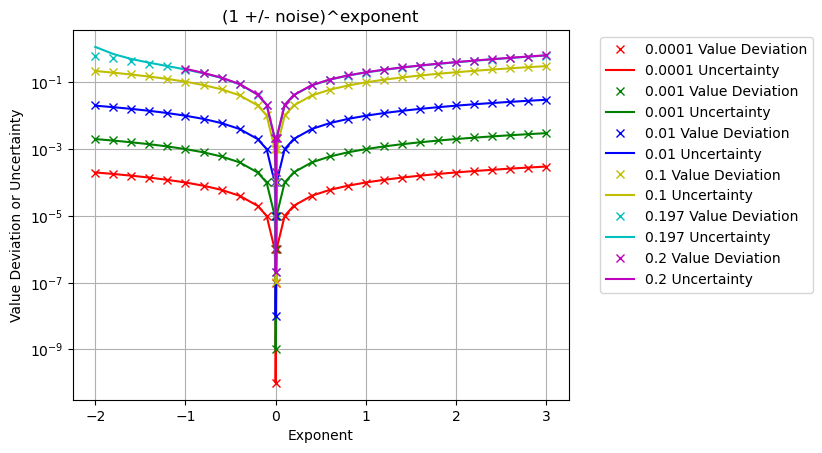

In [10]:
PlotValues()

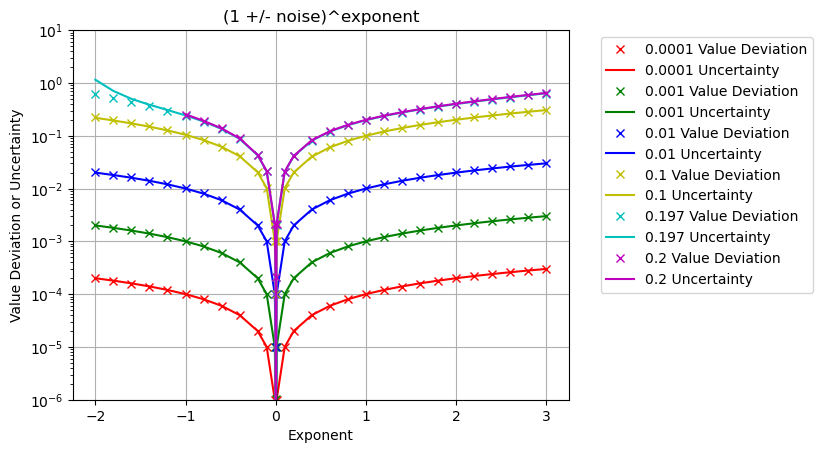

In [11]:
PlotValues(ylim=[1e-6,10])

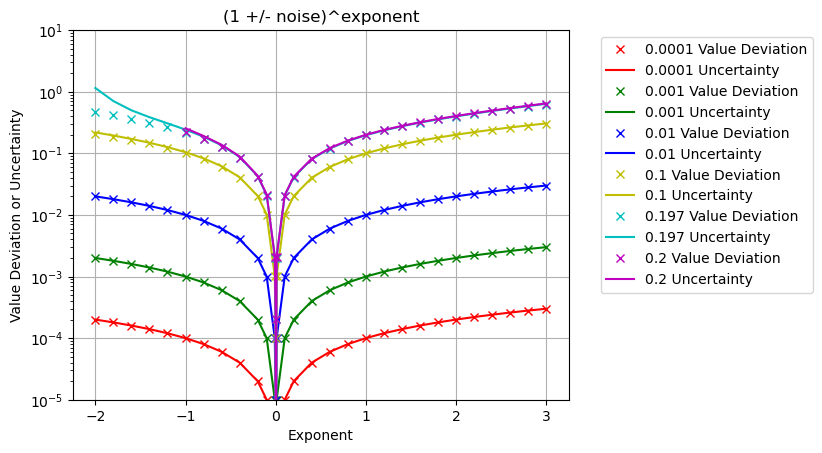

In [12]:
PlotValues(ylim=[1e-5,10], noiseType='Uniform')

In [13]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$(1 \pm \delta x)^c$ with ' + noiseType + ' noise')
    ax.set_xlabel('c')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim([1e-6,10])
    ax.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    #ax2.set_yscale('log')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.575, 1.0))
    ax2.legend(bbox_to_anchor=(1.575, 0.3))
    

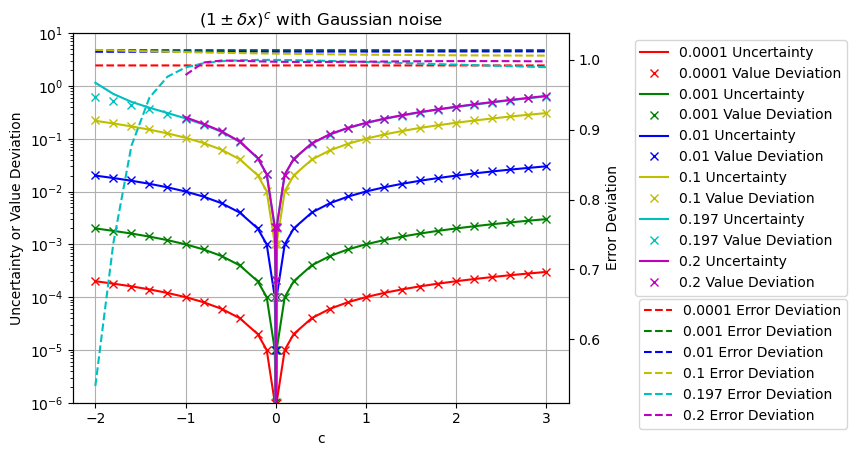

In [14]:
PlotErrorDev()

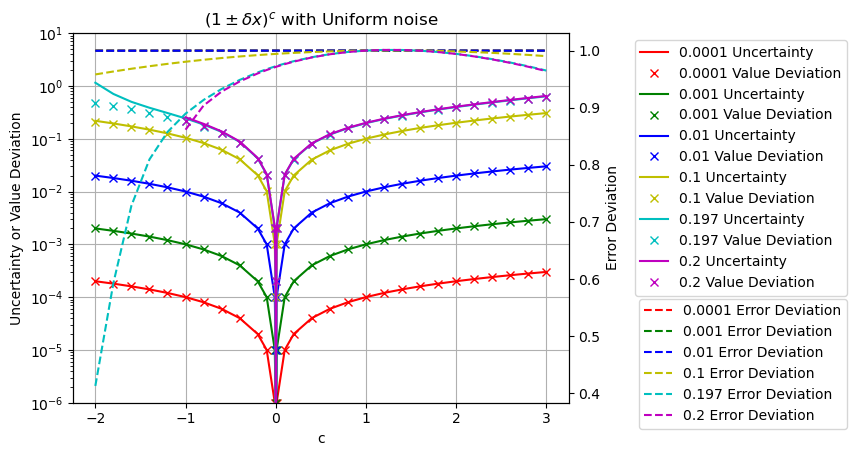

In [15]:
PlotErrorDev('Uniform')

In [16]:
def PlotErrorDev( noiseType='Gaussian', sNoiseStyleMarker=[(0.2,'-','<'), (1e-1,'-.','>'), (1e-2,':','^'), (1e-3,'--','v')],
                  ylim=(1e-6, 1e1) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$(1 \pm \delta x)^c$ with ' + noiseType + ' noise')
    ax.set_xlabel('c')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim([1e-6,10])
    ax.grid(True)
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], f'k{style}', label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], f'k{marker}', label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], c='gray', ls=style, label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.58, 0.5))
    ax2.legend(bbox_to_anchor=(1.58, 0.9))

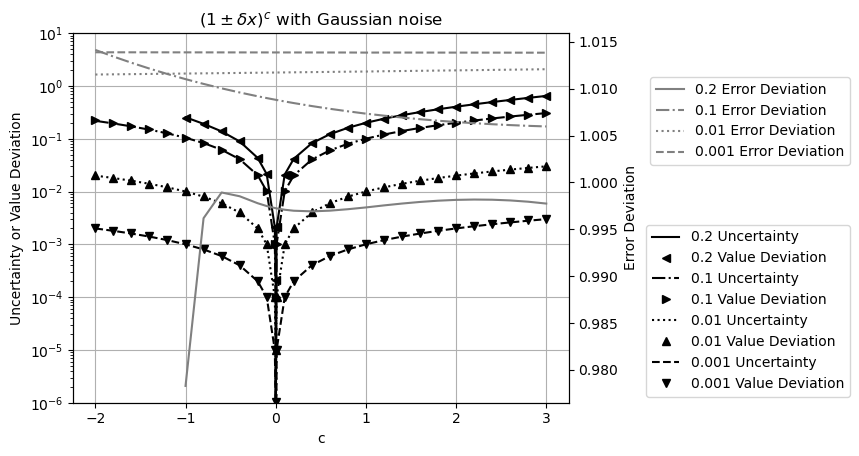

In [17]:
PlotErrorDev()

In [18]:
df[(df['NoiseType']=='Gaussian') & (df['Noise']>=1e-15)]['Error Deviation'].describe()

count    522.000000
mean       0.983899
std        0.133540
min        0.000000
25%        0.991933
50%        1.006271
75%        1.010892
max        1.134198
Name: Error Deviation, dtype: float64

# Mean vs Bias

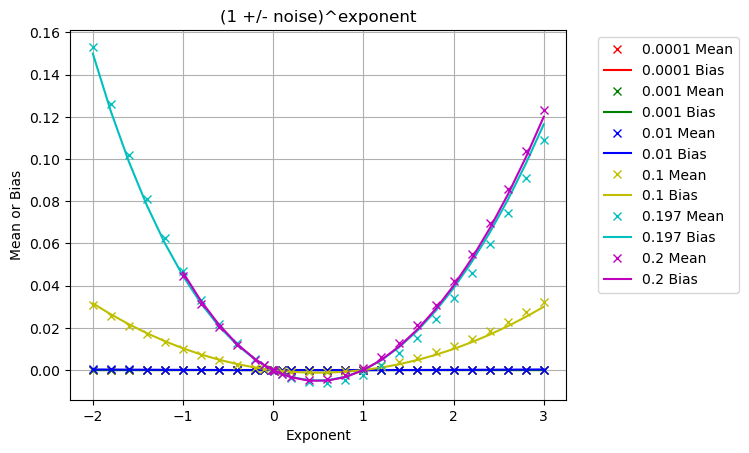

In [19]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'], logy=False)

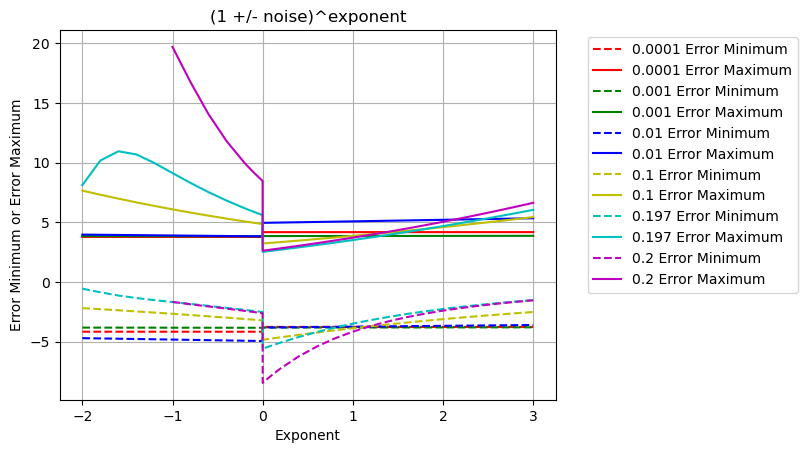

In [20]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# vs Noise vs X

In [30]:
def PlotSurface(value, noiseType, cmap=plt.cm.gray):
    logz = (value == 'Uncertainty')
    dfOrderVsNoise = df[(df['NoiseType']==noiseType)]\
                .pivot(index='Noise', columns='X', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=cmap )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    ax.set_title(r'$(1 \pm \delta x)^c$ with ' + noiseType + ' noise')
    
    ax.set_xlabel('c')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 4)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel(r'Input Noise $\delta x$')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

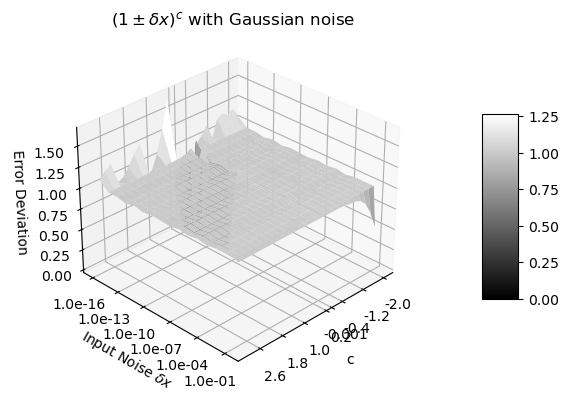

In [31]:
PlotSurface('Error Deviation', 'Gaussian')

ValueError: cannot convert float NaN to integer

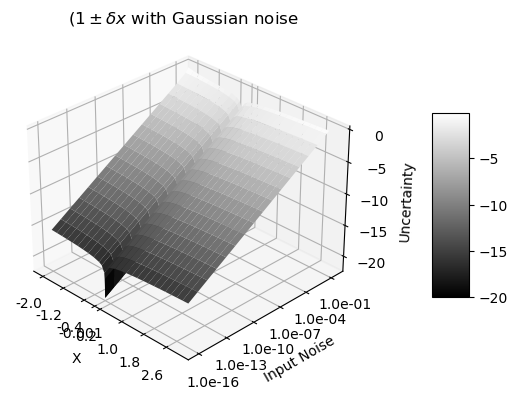

In [27]:
PlotSurface('Uncertainty', 'Gaussian')

# Histogram

In [ ]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

In [ ]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique(),
               sStyle=['r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'y-', 'y--', 'c-', 'c--', 'm-', 'm--'] ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot( xlabel='Normalized Error', ylabel='Normalized Histogram Count',
                                title='(1 +/- noise)^exponent',
                                style=sStyle)
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.0, 1.0))    


In [ ]:
PlotHisto( sNoise=[0.01, 0.02, 0.05, 0.1, 0.195, 0.2], sX=[-1.5,-2] )

In [ ]:
PlotHisto( sNoise=[0.01, 0.02, 0.05, 0.1, 0.195, 0.2], sX=[-1.5,-2],sNoiseType=['Gaussian'] )

In [ ]:
PlotHisto(sNoiseType=['Gaussian'])

In [ ]:
PlotHisto()

In [ ]:
PlotHisto(sX=[2])

In [ ]:
PlotHisto(sX=[-2])

In [ ]:
PlotHisto(sX=[-1])

In [ ]:
PlotHisto(sX=[2])

In [ ]:
PlotHisto(sX=[-0.5])

In [ ]:
PlotHisto(sX=[0.75])

In [ ]:
PlotHisto(sX=[-0.75])

In [ ]:
PlotHisto(sX=[+1])

In [ ]:
PlotHisto(sX=[-1])